In [1]:
library(tidyverse)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.1       ✔ purrr   0.3.2  
✔ tibble  2.1.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.3       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


## Question 1

In [2]:
survey_data = read.csv("RIKZ.csv")
head(survey_data)

Sample,C1,P1,P2,P3,P4,P5,P6,P7,P8,...,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach
1,4,0,0,0,0,0,1,0,0,...,10,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.830,1
2,0,0,1,0,0,0,0,0,0,...,10,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.000,1
3,0,0,3,0,0,0,0,0,0,...,10,29.4,17.5,-1.336,237.1,194.5,0.10,3.45,59.220,1
4,0,0,0,0,0,0,0,0,0,...,10,29.4,17.5,0.616,248.6,221.0,0.15,1.60,67.750,1
5,1,0,0,0,0,0,0,0,0,...,10,29.4,17.5,-0.684,251.9,202.0,0.05,2.45,57.760,1
6,0,0,0,0,0,1,0,0,0,...,8,29.6,20.8,1.190,250.1,192.5,0.10,2.50,53.075,2


In [3]:
survey_tbl = read_csv("RIKZ.csv")

Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


In [ ]:
## how do I do the column specs? 

## Question 2

In [4]:
head(survey_tbl)

Sample,C1,P1,P2,P3,P4,P5,P6,P7,P8,...,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach
1,4,0,0,0,0,0,1,0,0,...,10,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.830,1
2,0,0,1,0,0,0,0,0,0,...,10,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.000,1
3,0,0,3,0,0,0,0,0,0,...,10,29.4,17.5,-1.336,237.1,194.5,0.10,3.45,59.220,1
4,0,0,0,0,0,0,0,0,0,...,10,29.4,17.5,0.616,248.6,221.0,0.15,1.60,67.750,1
5,1,0,0,0,0,0,0,0,0,...,10,29.4,17.5,-0.684,251.9,202.0,0.05,2.45,57.760,1
6,0,0,0,0,0,1,0,0,0,...,8,29.6,20.8,1.190,250.1,192.5,0.10,2.50,53.075,2


## Question 3

In [5]:
survey_data[1,2:76]>0

C1,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,M12,M14,M15,M16,M17,I1,I2,I3,I4,I5
TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,TRUE,FALSE,FALSE


In [6]:
sum(survey_data[1,2:76]>0)

[1] 11

In [7]:
(survey_data[1:45,2:76]>0) %>% apply( 1, sum)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
11 10 13 11 10  8  9  8 19 17  6  1  4  3  3  1  3  3  1  4  3 22  6  0  6  5 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 
 4  1  6  4  2  1  1  3  4  3  5  7  5  0  7 11  3  0  2

In [8]:
survey_data <- survey_data %>%
    add_column(richness = (survey_data[1:45,2:76]>0) %>% apply( 1, sum))

survey_data

Sample,C1,P1,P2,P3,P4,P5,P6,P7,P8,...,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach,richness
1,4,0,0,0,0,0,1,0,0,...,29.4,17.500,0.045,253.9,222.5,0.0500,2.05,69.8300,1,11
2,0,0,1,0,0,0,0,0,0,...,29.4,17.500,-1.036,226.9,200.0,0.3000,2.50,59.0000,1,10
3,0,0,3,0,0,0,0,0,0,...,29.4,17.500,-1.336,237.1,194.5,0.1000,3.45,59.2200,1,13
4,0,0,0,0,0,0,0,0,0,...,29.4,17.500,0.616,248.6,221.0,0.1500,1.60,67.7500,1,11
5,1,0,0,0,0,0,0,0,0,...,29.4,17.500,-0.684,251.9,202.0,0.0500,2.45,57.7600,1,10
6,0,0,0,0,0,1,0,0,0,...,29.6,20.800,1.190,250.1,192.5,0.1000,2.50,53.0750,2,8
7,0,0,0,1,1,0,0,0,0,...,29.6,20.800,0.820,257.1,205.5,0.1000,1.85,54.4100,2,9
8,0,0,0,0,0,0,0,0,0,...,29.6,20.800,0.635,247.9,211.5,0.1000,1.70,60.4050,2,8
9,0,0,0,21,11,3,0,34,0,...,29.6,20.800,0.061,248.9,205.5,0.1500,2.30,58.8100,2,19
10,0,2,0,2,0,0,0,7,0,...,29.6,20.800,-1.334,257.9,197.0,0.0000,2.60,59.5750,2,17


In [87]:
survey_data_richness = survey_data[ , 77:90]
head(survey_data_richness)

week,angle1,angle2,exposure,salinity,temperature,NAP,penetrability,grainsize,humus,chalk,sorting1,Beach,richness
1,32,96,10,29.4,17.5,0.045,253.9,222.5,0.05,2.05,69.830,1,11
1,62,96,10,29.4,17.5,-1.036,226.9,200.0,0.30,2.50,59.000,1,10
1,65,96,10,29.4,17.5,-1.336,237.1,194.5,0.10,3.45,59.220,1,13
1,55,96,10,29.4,17.5,0.616,248.6,221.0,0.15,1.60,67.750,1,11
1,23,96,10,29.4,17.5,-0.684,251.9,202.0,0.05,2.45,57.760,1,10
1,129,89,8,29.6,20.8,1.190,250.1,192.5,0.10,2.50,53.075,2,8


## Question 6 and 7

In [41]:
library(readr)
library(dplyr)
library(ggplot2)

In [85]:
my_model = lm(richness ~ angle1 + angle2 + 
              exposure + salinity + temperature + NAP + 
              penetrability + grainsize + humus + chalk + 
              sorting1+ Beach, data=survey_data_richness)
summary(my_model)


Call:
lm(formula = richness ~ angle1 + angle2 + exposure + salinity + 
    temperature + NAP + penetrability + grainsize + humus + chalk + 
    sorting1 + Beach, data = survey_data_richness)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.4344 -1.3933 -0.5195  0.7726 11.6044 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -43.371160  47.580750  -0.912    0.369    
angle1         -0.009397   0.010924  -0.860    0.396    
angle2          0.053760   0.040977   1.312    0.199    
exposure       -0.541853   1.856944  -0.292    0.772    
salinity        1.020630   1.311337   0.778    0.442    
temperature     1.195516   1.230227   0.972    0.338    
NAP            -2.765120   0.580865  -4.760 3.98e-05 ***
penetrability  -0.006443   0.007021  -0.918    0.366    
grainsize       0.019833   0.030860   0.643    0.525    
humus           0.306015   9.087738   0.034    0.973    
chalk          -0.137526   0.138167  -0.995    0.327    
sorting1       

In [91]:
## why did the above change values when I include all variables vs just chalk and humus? 
## NAP has significant effect.. things like angle1, penetrability and sorting1 have very little impact

In [88]:
my_model = lm(richness ~ humus + chalk, data=survey_data_richness)
summary(my_model)


Call:
lm(formula = richness ~ humus + chalk, data = survey_data_richness)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7509 -3.2179 -0.6013  1.4040 17.2210 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.90893    1.17004   4.196 0.000138 ***
humus       28.37324   11.39072   2.491 0.016779 *  
chalk       -0.08122    0.07632  -1.064 0.293356    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.62 on 42 degrees of freedom
Multiple R-squared:  0.1863,	Adjusted R-squared:  0.1475 
F-statistic: 4.808 on 2 and 42 DF,  p-value: 0.01318


## Question 8

In [89]:
my_model = lm(richness ~ ., data=survey_data_richness)
summary(my_model)


Call:
lm(formula = richness ~ ., data = survey_data_richness)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5434 -1.3910 -0.2209  0.8268 11.6548 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)   -21.714257  62.877690  -0.345    0.732    
week            1.537678   2.873627   0.535    0.596    
angle1         -0.008529   0.011166  -0.764    0.451    
angle2          0.078737   0.062419   1.261    0.217    
exposure       -0.192513   1.988243  -0.097    0.923    
salinity       -0.149684   2.557775  -0.059    0.954    
temperature     1.645499   1.501715   1.096    0.282    
NAP            -2.727377   0.591672  -4.610 6.55e-05 ***
penetrability  -0.008968   0.008525  -1.052    0.301    
grainsize       0.015923   0.032054   0.497    0.623    
humus          -0.361549   9.275088  -0.039    0.969    
chalk          -0.127028   0.141104  -0.900    0.375    
sorting1        0.004410   0.042521   0.104    0.918    
Beach          -1.044276   1.7

In [93]:
## R2 value is 0.6063.. 
## can fit better by removing variables with small influence 
## and including interaction between variables

## Question 9 

In [90]:
my_model = lm(richness ~ (NAP+humus+week+temperature+Beach+exposure)^2, data=survey_data_richness)
summary(my_model)


Call:
lm(formula = richness ~ (NAP + humus + week + temperature + Beach + 
    exposure)^2, data = survey_data_richness)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.5431 -1.2955  0.2008  1.0693  3.1187 

Coefficients: (2 not defined because of singularities)
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)           93.7473   174.8374   0.536 0.596562    
NAP                  -16.2993    17.2738  -0.944 0.354412    
humus                448.8751   560.0204   0.802 0.430376    
week                 -47.3346    90.8420  -0.521 0.606907    
temperature           -3.0310     4.8275  -0.628 0.535789    
Beach                  7.2087     4.7040   1.532 0.137972    
exposure              -2.8755     9.0345  -0.318 0.752915    
NAP:humus             22.7491    10.0872   2.255 0.033121 *  
NAP:week              -2.5208     0.6325  -3.986 0.000514 ***
NAP:temperature       -0.3111     0.4990  -0.623 0.538722    
NAP:Beach              0.9338     0.2524   3.6

In [ ]:
## including interaction substantially increads R2

## Trying to Graph

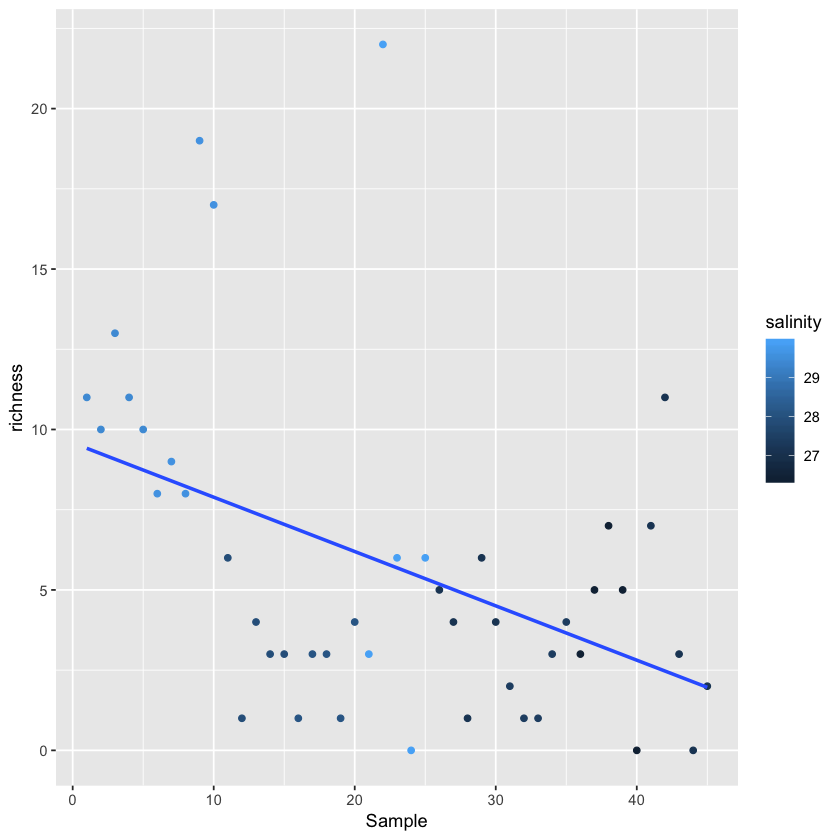

In [75]:
ggplot(survey_data_richness, aes(x = Sample, y = richness, col = salinity)) + 
  geom_point() + 
  geom_smooth(method = lm, se = FALSE, formula=y ~ x) + 
  labs(x = "Sample", y = "richness")

Warning message:
“Ignoring unknown parameters: fun”Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”No summary function supplied, defaulting to `mean_se()


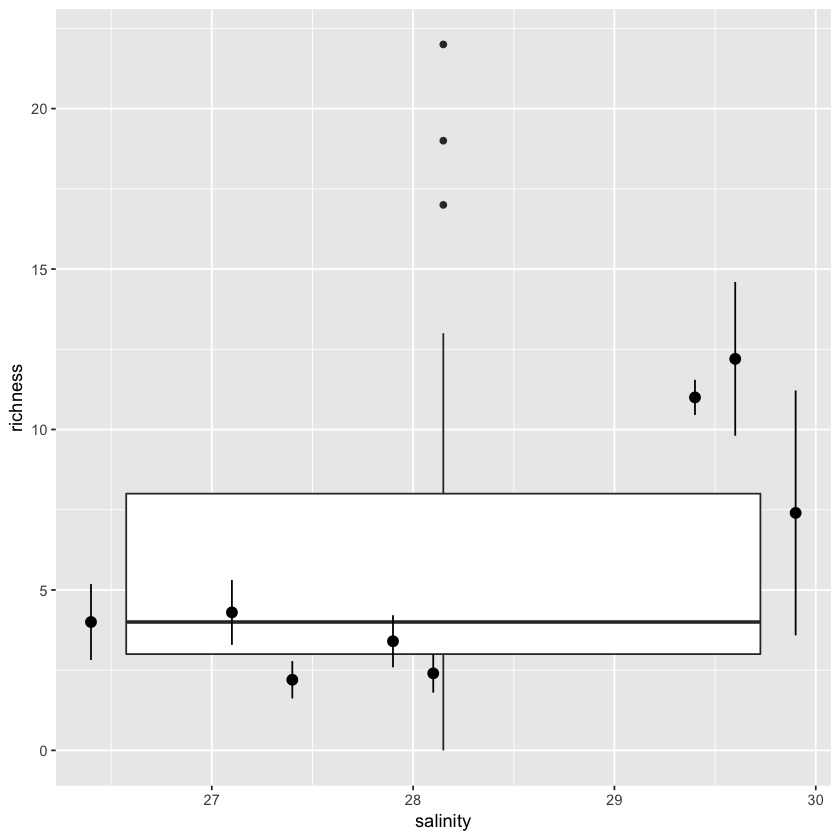

In [69]:
ggplot(survey_data_richness, aes(salinity, richness)) + 
  geom_boxplot() + 
  stat_summary(fun = mean)

In [73]:
install.packages("moderndive")

also installing the dependencies ‘glue’, ‘lifecycle’, ‘rlang’, ‘tidyselect’, ‘vctrs’, ‘pillar’, ‘ellipsis’, ‘dplyr’, ‘tibble’, ‘janitor’, ‘infer’

Warning message in download.file(url, destfile, method, mode = "wb", ...):
“downloaded length 409600 != reported length 861658”Warning message in download.file(url, destfile, method, mode = "wb", ...):
“URL 'https://cran.r-project.org/src/contrib/rlang_0.4.12.tar.gz': status was 'Failure when receiving data from the peer'”

Error in download.file(url, destfile, method, mode = "wb", ...) : 
  download from 'https://cran.r-project.org/src/contrib/rlang_0.4.12.tar.gz' failed


Warning message in download.packages(pkgs, destdir = tmpd, available = available, :
“download of package ‘rlang’ failed”Warning message in install.packages("moderndive"):
“installation of package ‘glue’ had non-zero exit status”Warning message in install.packages("moderndive"):
“installation of package ‘ellipsis’ had non-zero exit status”Warning message in install.packages("moderndive"):
“installation of package ‘lifecycle’ had non-zero exit status”Warning message in install.packages("moderndive"):
“installation of package ‘vctrs’ had non-zero exit status”Warning message in install.packages("moderndive"):
“installation of package ‘tidyselect’ had non-zero exit status”Warning message in install.packages("moderndive"):
“installation of package ‘pillar’ had non-zero exit status”Warning message in install.packages("moderndive"):
“installation of package ‘tibble’ had non-zero exit status”Warning message in install.packages("moderndive"):
“installation of package ‘dplyr’ had non-zero exit st